<a href="https://colab.research.google.com/github/sayarghoshroy/Image-Classification-Formulations/blob/master/Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Uncomment in case of using colab
# Upload the dataset directory as a zip into current runtime
# unzip using the following snippet
# refresh file section to view changes

from zipfile import ZipFile
file_name = "dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extraction Successful')

Extraction Successful


In [2]:
# Installing Libraries
# Uncomment if requirement is not already satisfied
# !pip install scikit-learn matplotlib Pillow

In [3]:
# Importing Libraries
import warnings
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

warnings.simplefilter('ignore')
plt.ion()
%matplotlib inline

In [4]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

## Datasets 

### The following three datasets will be used for this task:

1. IIIT-CFW
2. IMFDB
3. Yale Face Database

### Loading Datasets

In [5]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Loading images using PIL
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Loading the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Displays N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [6]:
figure_number = 1
# to save all plots and figures

In [7]:
import matplotlib as mpl

def normalize(mat):
    mat_max = np.max(mat.astype(np.float64))
    new_matrix = mat / mat_max
    return new_matrix

def display_images(imgs,classes,row = 1, col = 2, w = 64,h = 64):
    fig = plt.figure(figsize = (8, 8))
    for i in range(1, col * row + 1):
        img = imgs[i - 1]
        fig.add_subplot(row, col, i)

        if opt['is_grayscale']:
            plt.imshow(normalize(img).astype(np.float64), vmin = 0, vmax = 255, norm = mpl.colors.Normalize(vmin = 0, vmax = 255, clip=True), cmap = 'gray') 
        else:
            plt.imshow(normalize(img).astype(np.float64), vmin = 0, vmax = 255, norm = mpl.colors.Normalize(vmin = 0, vmax = 255, clip=True)) 
        
        plt.title("Class:{}".format(classes[i - 1]))
        plt.axis('off')
    
    global figure_number
    plt.savefig(str(figure_number) + ".png", format = 'png', dpi = 500)
    figure_number += 1
    
    plt.show()

In [8]:
# Loading the dataset
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

Dataset shape: (400, 32, 32, 3)


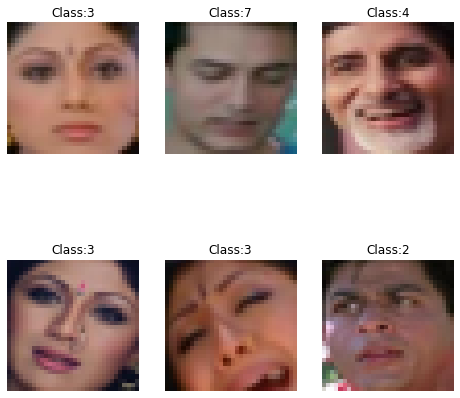

In [9]:
# Showing sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Feature Set:

   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

> VGG and Resnet features are learned by training a neural model for image classification


In [10]:
# Flattening to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [11]:
dirpath = './dataset/IIIT-CFW/'
X_IIIT_CFW,y_IIIT_CFW = load_data(dirpath)
N,H,W = X_IIIT_CFW.shape[0:3]
C = 1 if opt['is_grayscale'] else X_IIIT_CFW.shape[3]
X_IIIT_CFW = X_IIIT_CFW.reshape((N,H*W*C))

Dataset shape: (672, 32, 32, 3)


In [12]:
dirpath = './dataset/Yale_face_database/'
X_Yale,y_Yale = load_data(dirpath)
N,H,W = X_Yale.shape[0:3]
C = 1 if opt['is_grayscale'] else X_Yale.shape[3]
X_Yale = X_Yale.reshape((N,H*W*C))

Dataset shape: (165, 32, 32, 3)


###  Eigen Face:
Using principal component analysis to get the eigen faces.

Sklearn documentation is avaliable [here](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [13]:
def get_pca(X,k):
    pca = PCA(n_components=k, svd_solver='full')
    X_k = pca.fit_transform(X)
    return X_k

###  Kernel Face:
Using Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used such as Polynomial, rbf, sigmoid. A list of kernels is available [here](!https://data-flair.training/blogs/svm-kernel-functions/).

Sklearn documentation for KPCA can be found [here](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA).

In [14]:
def get_kernel_pca(X,k,kernel='rbf', degree=3):
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k

### Fisher Face
Representation is obtained using linear discriminant analysis. This method for facial recognition is less sensitive to variation in lighting and face pose as compared to eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimensionality reduction stage.

Sklearn documentation for Fischer LDA can be read [here](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html). 

In [15]:
def get_lda(X, y, k):
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### Kernel Fisher Face
Using LDA with different kernels in a manner similiar to Kernel-PCA. The input is directly transformed instead of using the kernel trick.  

In [16]:
def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X,y)
    return X_k

### VGG Features
VGG Neural Network is a 19 layer CNN architecture introduced by Andrew Zisserman [here](!https://arxiv.org/pdf/1409.1556.pdf). The features are obtained from the last fully connected layer of this model trained for face classification.

In [17]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNNs with large depth. To effectively train these networks, skip connections are utilized as short-cuts to jump over some layers. This helps in solving the [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

A 50 layer resnet model was trained for face classification and the final layer representations are used as features here.

In [18]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

In [19]:
# Helper Functions
get_dataset_name = {0: "IMFDB", 1: "IIIT-CFW", 2: "Yale Face Database"}

def get_dataset(index):
    datasets = {0: 'IMFDB', 1: 'IIIT-CFW', 2: 'Yale_face_database'}
    return datasets[index]

def get_X_dataset(index):
    if index == 0:
        return X
    elif index == 1:
        return X_IIIT_CFW
    else:
        return X_Yale

def get_y_dataset(index):
    if index == 0:
        return y
    elif index == 1:
        return y_IIIT_CFW
    else:
        return y_Yale

## Eigen Faces

Eigenfaces are a set of selected eigenvectors of the covariance matrix of the dataset of images, utilized to solve the problem of face recognition.

We typically select the select eigenvectors corresponding to the top-K eigenvalues, K being less than the number of non-zero eigenvalues.

## Number of eigen spectrum components for sufficiently good reconstruction

We sort the (eigenvalue, eigenvector) pairs in descending order based on their eigenvalue.

Let S be the real sum of all eigenvalues.

Let S(N) be the sum of first N eigenvalues.

We select number of eigenfaces as the least possible $N$ s.t:

$\frac{S(N)}{S} \ge 0.95$

Based on this idea:
Number of eigenfaces required to represent:
1. IMFDB = 124
2. IIIT-CFW = 309
3. Yale Face Database = 62

Refer to the following experimental results for added clarity.

In [20]:
def analyze(dataset):
    X_use = get_X_dataset(dataset)
    eigenvalues, _ = np.linalg.eig(np.cov(X_use.T))
    eigenvalues = np.sort(eigenvalues)
    eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

    sum_of_eigenvalues = np.sum(np.real(eigenvalues))

    count = 0
    for value in range(len(eigenvalues)):
        count += 1
        if (np.sum(np.real(eigenvalues[0:count]) / sum_of_eigenvalues)) >= 0.95:
            break

    print("Number of Eigenvalues required for PCA :", str(count))

    plt.figure()
    plt.title('Eigenvalue Spectrum')
    plt.xlabel('Eigenvalue Rank')
    plt.ylabel('Eigenvalue')
    plt.plot(np.real(eigenvalues[0:150]))
    global figure_number
    plt.savefig(str(figure_number)+".png", format = 'png', dpi=500)
    figure_number += 1
    plt.show()

Number of Eigenvalues required for PCA : 98


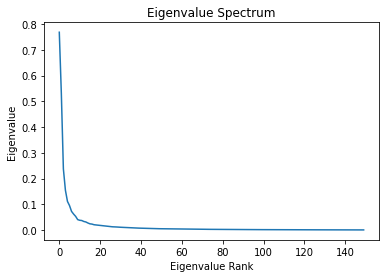

In [21]:
# For IMFDB
analyze(0)

Number of Eigenvalues required for PCA : 202


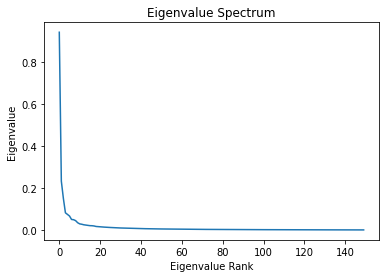

In [22]:
# For IIIT-CFB
analyze(1)

Number of Eigenvalues required for PCA : 38


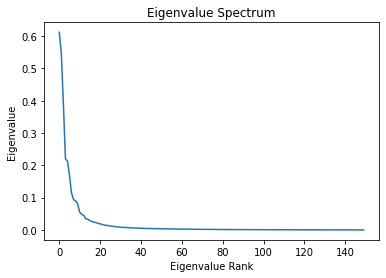

In [23]:
# For Yale Face Database
analyze(2)

In [24]:
# Compute your features 
# For IMFDB Dataset
X_3D = get_kernel_lda(X,y,3)

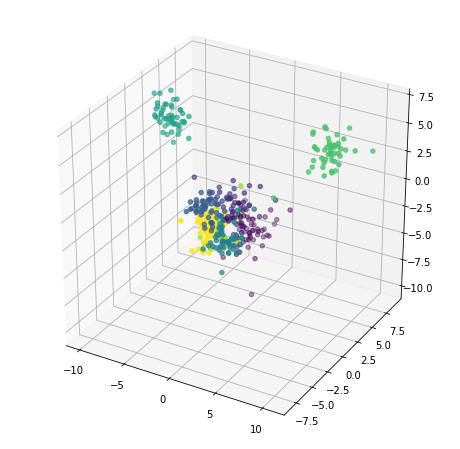

In [25]:
# Creating a scatter plot  
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=500)
figure_number += 1
fig.show()

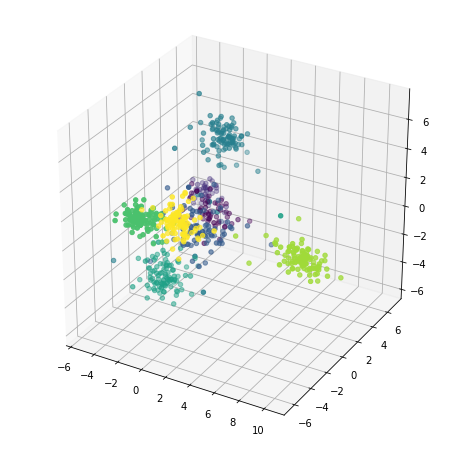

In [26]:
# For IIIT-CFW Dataset
X_3D = get_kernel_lda(X_IIIT_CFW,y_IIIT_CFW,3)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y_IIIT_CFW)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=500)
figure_number += 1
fig.show()

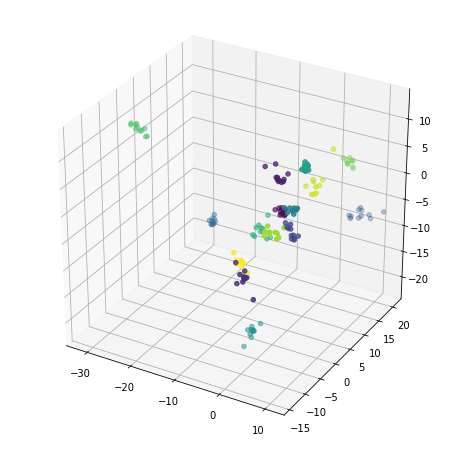

In [27]:
# For Yale Face Database
X_3D = get_kernel_lda(X_Yale,y_Yale,3)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y_Yale)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=500)
figure_number += 1
fig.show()

## Image Reconstruction


In [28]:
def reconstruct_images(X, dataset):
    # Using only PCA for reconstruction
    # Doing LDA for reconstruction follows a convoluted approach and the results are pretty useless
    # Doing K-PCA with 'rbf' kernel gives worse results
    # In a nutshell, it does not make any sense to do reconstruction with anything but pure PCA
    get_k = {0: 48, 1: 35, 2: 10, 3: 7}
    # 3: Use 7 by default
    pca = PCA(n_components = get_k[dataset], svd_solver='full')
    X_k = pca.fit_transform(X)
    reconstructed = pca.inverse_transform(X_k)
    return reconstructed  

	Using Dataset IMFDB
	Sample Images:


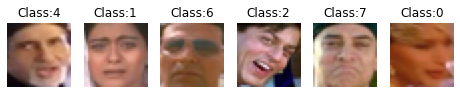

	Using Dataset IIIT-CFW
	Sample Images:


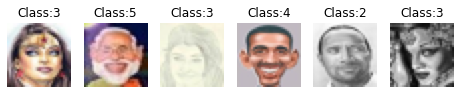

	Using Dataset Yale Face Database
	Sample Images:


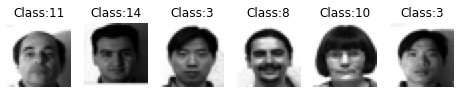

In [29]:
# Sampling Images
for dataset in range(3):
    X_use = get_X_dataset(dataset)
    y_use = get_y_dataset(dataset)
    
    print("\tUsing Dataset " + get_dataset_name[dataset])
    print("\tSample Images:")
    ind = np.random.randint(0,y_use.shape[0],6)
    display_images(X_use[ind,...].reshape(-1, 32, 32, 3),y_use[ind], row=1,col=6)

## Computing the Reconstruction Errors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Using Dataset IMFDB
Reconstructed Images


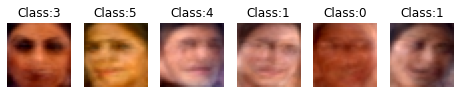

Reconstruction Error = 0.055607522183325396


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Using Dataset IIIT-CFW
Reconstructed Images


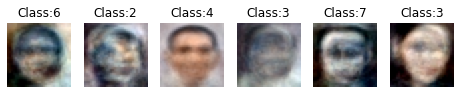

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstruction Error = 0.12274292201610433
Using Dataset Yale Face Database
Reconstructed Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


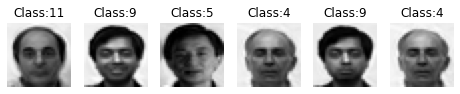

Reconstruction Error = 0.042742459527470446


In [30]:
for dataset in range(3):
    # Displaying results
    X_use = get_X_dataset(dataset)
    y_use = get_y_dataset(dataset)
    X_reconstructed = reconstruct_images(X_use, 0)
    
    print("Using Dataset " + get_dataset_name[dataset])
    print("Reconstructed Images")
    # Displaying random images
    ind = np.random.randint(0,y_use.shape[0],6)
    display_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y_use[ind],row=1,col=6)
    # Showing the reconstruction error
    print("Reconstruction Error = " + str(np.sqrt(np.mean((X_use - X_reconstructed) ** 2))))

## Reconstruction Complexity

We analyze the reconstruction loss for entities in the dataset with fixed number of eigenvectors and report the entity with the highest loss.

1. IMFDB: AmitabhBachan is the most difficult to represent with fewer eigenvectors. His images show a considerable deal of variation in terms of position, face size, orientation, physical expressions, lighting conditions.

2. IIIT-CFW: NarendraModi is the most difficult to represent with fewer eigenvectors. His images show a great deal of variation in terms of colors (black and white, pinkish, skintone), orientation and facial outline. Images with this label vary a lot from each other. Obama & Putin show a standard facial outline. ManmohanSingh has a set of blue pixels near the upper boundary. But for NarendraModi, variation is at its peak.

3. Yale Face Database: Class 14 images are the most difficult ones to be captured using fewer eigenvectors. Again, lack of proper patterns is what causes this. Some images in 14 have spectacles while others do not. Hence, this class required greater number of eigenvectors for more clarity. 

In [31]:
dataset_labels = {0: 8, 1: 8, 2: 15}

def get_dict(dataset):
    if dataset == 0:
        return imfdb_dict
    elif dataset == 1:
        return cfw_dict
    else:
        yale_dict = {}
        for i in range(15):
            yale_dict[("Label " + str(i))] = i
        return yale_dict

def analyze_actors(dataset):
    # Reconstructs images in all cases and evaluates reconstruction losses
    X_use = get_X_dataset(dataset)
    y_use = get_y_dataset(dataset)
    
    print("Using the " + str(get_dataset_name[dataset] + " dataset :"))
    losses = []
    for label in range(dataset_labels[dataset]):
        count_labels = 0
        store = np.zeros(shape = (X_use.shape[0], X_use.shape[1]))
        for index in range(X_use.shape[0]):
            if y_use[index] == label:
                store[count_labels] = X_use[index]
                count_labels += 1
        store_reconstructed = reconstruct_images(store[0:count_labels, :], dataset)
        loss = np.sqrt(np.mean((store[0:count_labels, :] - store_reconstructed) ** 2))
        losses.append(loss)
        print("Label :",str(label)+ ", Loss :", str(loss))
    print("Label with the highest Error :", np.flip(np.argsort(losses))[0])
    inverted = dict(map(reversed, get_dict(dataset).items()))
    print("Identity whose representation with fewer eigenvectors is most difficult :", inverted[np.flip(np.argsort(losses))[0]])

In [32]:
analyze_actors(0)

Using the IMFDB dataset :
Label : 0, Loss : 0.003610855517025107
Label : 1, Loss : 0.0048531441687866975
Label : 2, Loss : 0.0039908104530730236
Label : 3, Loss : 0.005285050922683698
Label : 4, Loss : 0.00571992558801819
Label : 5, Loss : 0.002242297541364775
Label : 6, Loss : 0.0038984640721881052
Label : 7, Loss : 0.00456087713052203
Label with the highest Error : 4
Identity whose representation with fewer eigenvectors is most difficult : AmitabhBachan


In [33]:
analyze_actors(1)

Using the IIIT-CFW dataset :
Label : 0, Loss : 0.04757312826046688
Label : 1, Loss : 0.03950143148434274
Label : 2, Loss : 0.06908239898618342
Label : 3, Loss : 0.0903589121464298
Label : 4, Loss : 0.09530374254102586
Label : 5, Loss : 0.1080447765475928
Label : 6, Loss : 0.10457220904168442
Label : 7, Loss : 0.09533368299804915
Label with the highest Error : 5
Identity whose representation with fewer eigenvectors is most difficult : NarendraModi


In [34]:
analyze_actors(2)

Using the Yale Face Database dataset :
Label : 0, Loss : 2.989873053850621e-16
Label : 1, Loss : 1.8018512525696297e-16
Label : 2, Loss : 2.331204483840745e-16
Label : 3, Loss : 2.1336019829714741e-16
Label : 4, Loss : 2.3907143565517363e-16
Label : 5, Loss : 3.198931958545831e-16
Label : 6, Loss : 3.747849198039712e-16
Label : 7, Loss : 3.704100354853022e-16
Label : 8, Loss : 2.2970295599361333e-16
Label : 9, Loss : 2.555076481368626e-16
Label : 10, Loss : 3.1719499322877053e-16
Label : 11, Loss : 2.327800511497767e-16
Label : 12, Loss : 2.901828307362603e-16
Label : 13, Loss : 2.469343625349054e-16
Label : 14, Loss : 4.718593356343745e-16
Label with the highest Error : 14
Identity whose representation with fewer eigenvectors is most difficult : Label 14


In [35]:
def analyze_datasets(dataset):
    X_use = get_X_dataset(dataset)
    X_reconstructed = reconstruct_images(X_use, 3) # to use top-7 eigenvalues
    loss = np.sqrt(np.mean((X_use - X_reconstructed) ** 2))
    return loss

In [36]:
# Finding dataset reconstruction losses
losses = []
for dataset in range(3):
    loss = analyze_datasets(dataset)
    print("Reconstruction Loss for Dataset " + get_dataset_name[dataset] + " = " + str(loss))

Reconstruction Loss for Dataset IMFDB = 0.10015563548512697
Reconstruction Loss for Dataset IIIT-CFW = 0.1823563229627823
Reconstruction Loss for Dataset Yale Face Database = 0.12366226600091611


In [37]:
# Clearly, IIIT-CFW is the toughest dataset to reconstruct

## Building Classifiers

All combinations of features and classifiers have been tried out for each dataset. Kindly refer to the tables below.

Using a combination of ResNet & VGGNet features with a Logistic Regression Classifier seems to give the best results.

[Face Recognition Using  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) is a useful reference for empirical analysis of different features and classifier architectures.

In [38]:
# Classifier Definitions

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

class Classifier():
    def __init__(self, classifier_type):
        if classifier_type == 0:
            # MLP
            self.model = MLPClassifier(hidden_layer_sizes = (1024, 512, 256), max_iter = 1000)
        elif classifier_type == 1:
            # SVM
            self.model = SVC(gamma = 'scale', max_iter = 1000)
        elif classifier_type == 2:
            # DTree
            self.model = DecisionTreeClassifier()
        elif classifier_type == 3:
            # Logistic Regression
            self.model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 2000)
    
    def classify(self,X):
        return self.model.predict(X)
        
    def confusion_matrix(self,pred,y):
        # Confusion matrix: table that is often used to describe performance of a classifier
        # on a set of test data for which the true values are known
        from sklearn.metrics import confusion_matrix
        return confusion_matrix(pred, y)
        
    def train(self,X_train,y_train):
        self.model.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        y_pred = self.model.predict(X_validate)
        
        # Create a confusion matrix
        #print("Confusion Matrix :")
        conf = self.confusion_matrix(y_validate, y_pred)
        
        # Calculate Validation accuracy
        acc = self.model.score(X_validate, y_validate)
        #print("Accuracy =", str(acc))
        
        # Calculate precision and recall 
        precision = precision_score(y_validate, y_pred, average='macro')
        recall = recall_score(y_validate, y_pred, average='macro')
        #print("Average Precision :", str(precision))
        
        # Calculate F1-score
        f1_scr = f1_score(y_validate, y_pred, average='micro')
        #print("F1 score :", str(f1_scr))
        return {'confusion_mat': conf, 'accuracy' : acc, 'error': (1 - acc), 'precision' : precision, 'f1-score' : f1_scr, 'recall' : recall, 'features' : X_validate.shape[1]}

In [39]:
# Creating a train and validation split to train the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [40]:
# Creating 3 tables - one table per dataset 
# Each table will have 5 columns with the following fields:
# Feature/Combination of feature used, reduced dimension space, classification error, accuracy, f1-score
clf_imfdb = Classifier(1)

In [41]:
# training
clf_imfdb.train(X_train, y_train)

In [42]:
results = clf_imfdb.validate(X_test, y_test)

In [43]:
def get_representation(X, y, feature, dataset):
    
    if feature == 0:
        return get_pca(X, 120)
    
    elif feature == 1:
        return get_kernel_pca(X, 40)
    
    elif feature == 2:
        return get_lda(X, y, 35)
    
    elif feature == 3:
        return get_kernel_lda(X, y, 35)
    
    elif feature == 4:
        return get_vgg_features('./dataset/' + get_dataset(dataset))
    
    elif feature == 5:
        return get_resnet_features('./dataset/' + get_dataset(dataset))
    
    elif feature == 6:
        set_a = get_vgg_features('./dataset/' + get_dataset(dataset))
        set_b = get_resnet_features('./dataset/' + get_dataset(dataset))
        return np.concatenate((set_a, set_b), axis = 1)

In [44]:
dataset_results = []
for dataset in range(3):
    all_results = []
    for feature in range(7):
        use_X = get_X_dataset(dataset)
        use_y = get_y_dataset(dataset)

        X_train, X_test, y_train, y_test = train_test_split(get_representation(use_X, use_y, feature, dataset), use_y, test_size=0.1, random_state=23)
        for inner in range(4):
            clf_imfdb = Classifier(inner)
            clf_imfdb.train(X_train, y_train)
            results = clf_imfdb.validate(X_test, y_test)
            all_results.append(results)
    dataset_results.append(all_results)

In [45]:
# Results
from IPython.display import display

classifier_type = ['MLP', 'SVM', 'D-Tree', 'LR']
feature_type = ['PCA', 'k-PCA', 'LDA', 'k-LDA', 'VGGNet', 'ResNet', 'VGG-net + Resnet']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

for dset in range(3):
    print("Results using dataset:", get_dataset_name[dset])
    d = {'Number of features': [i['features'] for i in dataset_results[dset]], 'Accuracy': [i['accuracy'] for i in dataset_results[dset]], 'Error': [i['error'] for i in dataset_results[dset]], 'Precision': [i['precision'] for i in dataset_results[dset]], 'F1-score': [i['f1-score'] for i in dataset_results[dset]], 'Recall': [i['recall'] for i in dataset_results[dset]]}
    df = pd.DataFrame(index = index_arr, data=d)
    display(df)
    export_csv = df.to_csv (get_dataset_name[dset] + "_all_classifier.csv", index = index_arr, header=True)

Results using dataset: IMFDB


,Number of features,Accuracy,Error,Precision,F1-score,Recall
PCA + MLP,120,0.825,0.175,0.797917,0.825,0.840476
PCA + SVM,120,0.775,0.225,0.750000,0.775,0.797619
PCA + D-Tree,120,0.600,0.400,0.596429,0.600,0.592262
PCA + LR,120,0.800,0.200,0.779167,0.800,0.818452
k-PCA + MLP,40,0.775,0.225,0.755952,0.775,0.776786
k-PCA + SVM,40,0.800,0.200,0.779167,0.800,0.822619
k-PCA + D-Tree,40,0.500,0.500,0.435268,0.500,0.483929
k-PCA + LR,40,0.550,0.450,0.554167,0.550,0.595238
LDA + MLP,7,1.000,0.000,1.000000,1.000,1.000000
LDA + SVM,7,1.000,0.000,1.000000,1.000,1.000000


Results using dataset: IIIT-CFW


,Number of features,Accuracy,Error,Precision,F1-score,Recall
PCA + MLP,120,0.661765,0.338235,0.672096,0.661765,0.655556
PCA + SVM,120,0.588235,0.411765,0.662685,0.588235,0.586657
PCA + D-Tree,120,0.308824,0.691176,0.274306,0.308824,0.296528
PCA + LR,120,0.602941,0.397059,0.597106,0.602941,0.584524
k-PCA + MLP,40,0.602941,0.397059,0.657955,0.602941,0.584722
k-PCA + SVM,40,0.602941,0.397059,0.674337,0.602941,0.611954
k-PCA + D-Tree,40,0.367647,0.632353,0.396447,0.367647,0.347867
k-PCA + LR,40,0.470588,0.529412,0.360261,0.470588,0.472520
LDA + MLP,7,0.970588,0.029412,0.970486,0.970588,0.972222
LDA + SVM,7,0.985294,0.014706,0.986111,0.985294,0.986111


Results using dataset: Yale Face Database


,Number of features,Accuracy,Error,Precision,F1-score,Recall
PCA + MLP,120,0.705882,0.294118,0.541667,0.705882,0.597222
PCA + SVM,120,0.647059,0.352941,0.583333,0.647059,0.569444
PCA + D-Tree,120,0.470588,0.529412,0.487179,0.470588,0.487179
PCA + LR,120,0.941176,0.058824,0.909091,0.941176,0.863636
k-PCA + MLP,40,0.764706,0.235294,0.772727,0.764706,0.757576
k-PCA + SVM,40,0.647059,0.352941,0.583333,0.647059,0.569444
k-PCA + D-Tree,40,0.470588,0.529412,0.388889,0.470588,0.472222
k-PCA + LR,40,0.294118,0.705882,0.255556,0.294118,0.300000
LDA + MLP,14,1.000000,0.000000,1.000000,1.000000,1.000000
LDA + SVM,14,1.000000,0.000000,1.000000,1.000000,1.000000


In [46]:
# Confusion matrices for the best models

# Best Model in Each Case: VGG-net + Resnet + LR
print("Dataset : IMFDB")
print("Confusion Matrix using Features: VGGnet + Resnet and Logistic Regression Classifier:")
print(dataset_results[0][len(dataset_results[0]) - 1]['confusion_mat'])
print("")
print("Dataset : IIIT-CFW")
print("Confusion Matrix using Features: VGGnet + Resnet and SVM classifier:")
print(dataset_results[1][len(dataset_results[1]) - 3]['confusion_mat'])
print("")
print("Dataset : Yale Face Database")
print("Confusion Matrix using Features: VGGnet + Resnet and Logistic Regression Classifier:")
print(dataset_results[1][len(dataset_results[2]) - 1]['confusion_mat'])

Dataset : IMFDB
Confusion Matrix using Features: VGGnet + Resnet and Logistic Regression Classifier:
[[7 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0]
 [0 0 0 5 0 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 7]]

Dataset : IIIT-CFW
Confusion Matrix using Features: VGGnet + Resnet and SVM classifier:
[[ 9  0  0  0  0  0  0  0]
 [ 0  6  0  0  1  0  0  0]
 [ 0  0  7  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  6]]

Dataset : Yale Face Database
Confusion Matrix using Features: VGGnet + Resnet and Logistic Regression Classifier:
[[ 9  0  0  0  0  0  0  0]
 [ 0  6  0  0  1  0  0  0]
 [ 0  0  6  0  1  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  6]]


## t-SNE

Using t-SNE, which is a more advanced clustering technique compared to the other algorithms we've used so far, we observe that similar people do come together in each and every dataset.

Using a combination of features: PCA, k-PCA, LDA, k-LDA, ResNet and VGGNet; everything looks nicely separated and clustered apart from certain outliers which are present in the datasets.

In [47]:
# Computing t-SNE for different features and creating a scatter plot
def get_TSNE(dataset):
    X_use = get_X_dataset(dataset)
    y_use = get_y_dataset(dataset)
    set_a = get_vgg_features('./dataset/' + get_dataset(dataset))
    set_b = get_resnet_features('./dataset/' + get_dataset(dataset))
    set_c = get_kernel_lda(X_use, y_use, 45)
    set_d = get_kernel_pca(X_use, 124)
    set_e = get_lda(X_use, y_use, 45)
    set_f = get_pca(X_use, 124)
    X = np.concatenate((set_a, set_b, set_c, set_d, set_e, set_f), axis = 1) # feature 

    # Compute
    X_TSNE_3D = TSNE(n_components = 3).fit_transform(X)
    X_TSNE_2D = TSNE(n_components = 2).fit_transform(X)
    return X_TSNE_3D, X_TSNE_2D

In [48]:
colors = {0 : 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5: 'black', 6: 'brown', 7: 'orange'}

In [49]:
# For the IMFDB Database
X_TSNE_3D, X_TSNE_2D = get_TSNE(0)

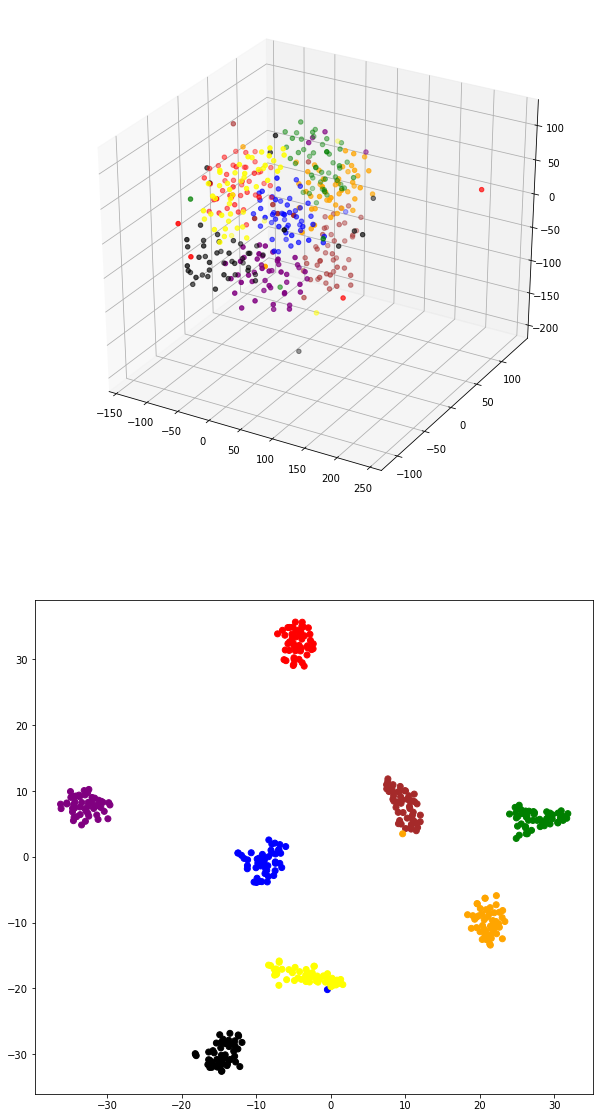

In [50]:
# Plotting the representation
colors_plot = [colors[i] for i in y]
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_TSNE_3D[:,0],X_TSNE_3D[:,1],X_TSNE_3D[:,2],c=colors_plot)
ay = fig.add_subplot(212)
ay.scatter(X_TSNE_2D[:,0],X_TSNE_2D[:,1],c=colors_plot)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=250)
figure_number += 1
fig.show()

In [51]:
# For the IIIT-CFD Database
X_TSNE_3D, X_TSNE_2D = get_TSNE(1)

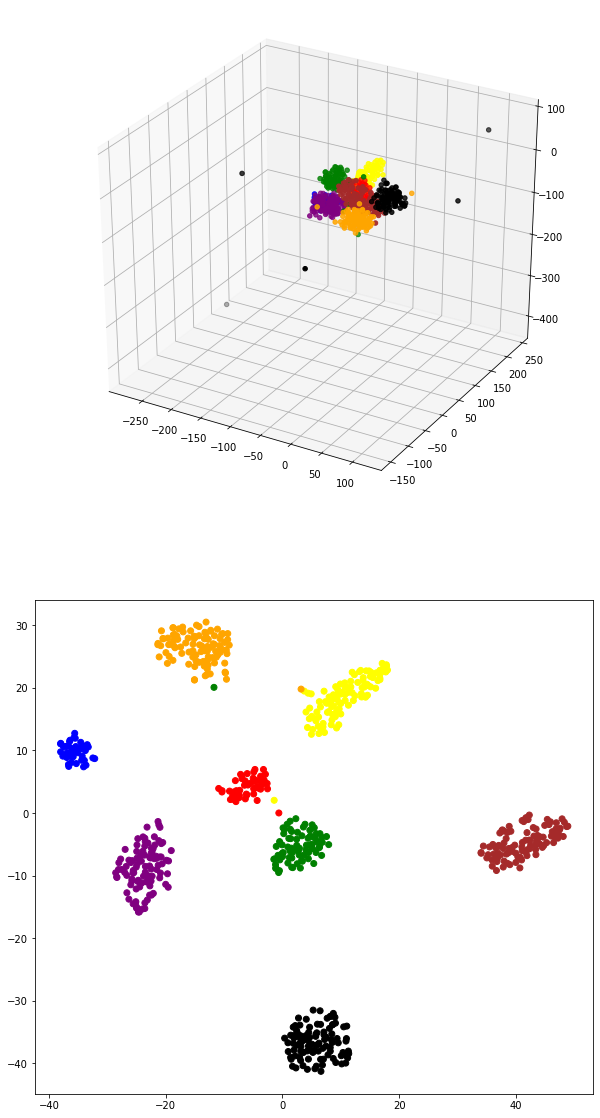

In [52]:
# Plotting the representation
colors_plot = [colors[i] for i in y_IIIT_CFW]
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_TSNE_3D[:,0],X_TSNE_3D[:,1],X_TSNE_3D[:,2],c=colors_plot)
ay = fig.add_subplot(212)
ay.scatter(X_TSNE_2D[:,0],X_TSNE_2D[:,1],c=colors_plot)
plt.savefig(str(figure_number)+".png", format = 'png', dpi=250)
figure_number += 1
fig.show()

In [53]:
# For the Yale Face Database
X_TSNE_3D, X_TSNE_2D = get_TSNE(2)

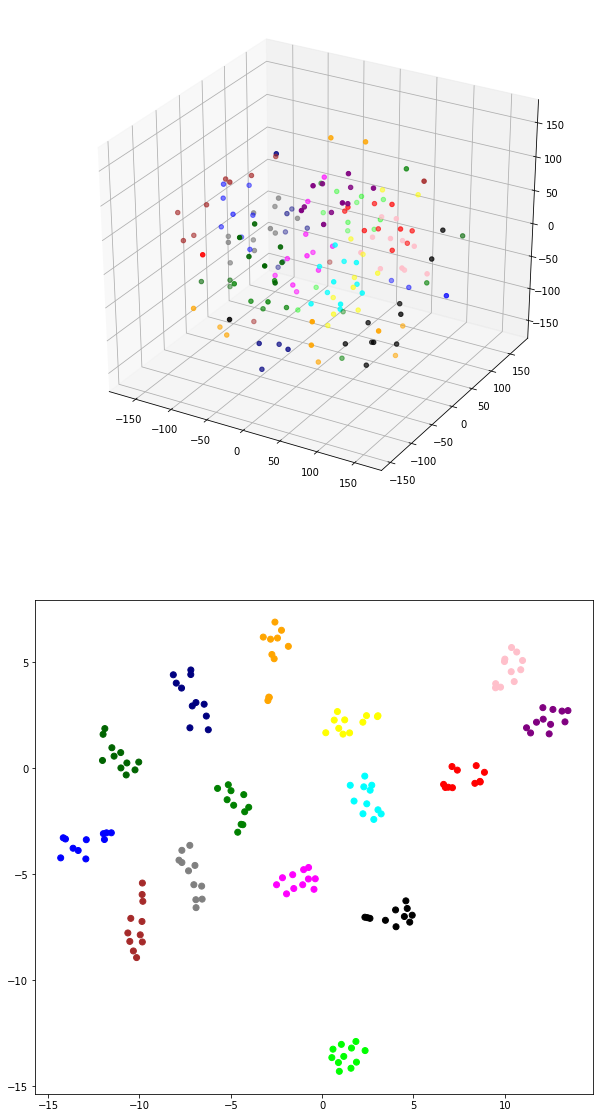

In [54]:
# Plotting the representation
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5: 'black', 6: 'brown', 7: 'orange',
          8: 'darkgreen', 9: 'magenta', 10: 'lime', 11: 'pink', 12: 'grey', 13: 'aqua', 14: 'navy'}
colors_plot = [colors[i] for i in y_Yale]
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_TSNE_3D[:,0],X_TSNE_3D[:,1],X_TSNE_3D[:,2],c=colors_plot)
ay = fig.add_subplot(212)
ay.scatter(X_TSNE_2D[:,0],X_TSNE_2D[:,1],c=colors_plot)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=250)
figure_number += 1
fig.show()

## `face` verification   

### Using KNN

- We run a K-Nearest Neighbours algorithm using the test image on our training data. If the output label and the test label match, we report a success.

### Performance Metrics

- We need to minimize unauthorized access. This translates to reducing the number of false positives. Therefore, maximizing precision is the key here.

$Precision = \frac{\#True\_Positives}{\#True\_Positives\ +\ \#False\_Positives}$

### Results

- Empirical results with possible combinations of features and classifiers have been shown in the tables below.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
class FaceVerification():
    def __init__(self, n):
        self.model = KNeighborsClassifier(n_neighbors=23)
    
    def verify(self,X,class_id):
        acc = self.model.score(X, class_id)
        if acc == 1:
            return True
        return False
        
    def train(self,X_train,y_train):
        self.model.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        y_pred = self.model.predict(X_validate)
        acc = self.model.score(X_validate, y_validate)
        precision = precision_score(y_validate, y_pred, average='macro')
        recall = recall_score(y_validate, y_pred, average='macro')
        f1_scr = f1_score(y_validate, y_pred, average='micro')
        return {'accuracy' : acc, 'error': (1 - acc), 'precision' : precision, 'f1-score' : f1_scr, 'recall' : recall, 'features' : X_validate.shape[1]}

In [56]:
# Creating a train and validation split and computing results   
dataset_results = []
for dataset in range(3):
    all_results = []
    for feature in range(7):
        use_X = get_X_dataset(dataset)
        use_y = get_y_dataset(dataset)

        X_train, X_test, y_train, y_test = train_test_split(get_representation(use_X, use_y, feature, dataset), use_y, test_size=0.1, random_state=23)
        
        clf_imfdb_knn = FaceVerification(7)
        clf_imfdb_knn.train(X_train, y_train)
        results = clf_imfdb_knn.validate(X_test, y_test)
        all_results.append(results)
    
    dataset_results.append(all_results)

In [57]:
# Creating 3 tables - one table for each dataset 
# Each table has 5 columns with the following fields:
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision
feature_type = ['PCA', 'k-PCA', 'LDA', 'k-LDA', 'VGGNet', 'ResNet', 'VGGNet + ResNet']
index_arr = [("KNN + " + j) for j in feature_type]

for dset in range(3):
    print("Results using dataset:", get_dataset_name[dset])
    d = {'Number of features': [i['features'] for i in dataset_results[dset]], 'Accuracy': [i['accuracy'] for i in dataset_results[dset]], 'Error': [i['error'] for i in dataset_results[dset]], 'Precision': [i['precision'] for i in dataset_results[dset]], 'F1-score': [i['f1-score'] for i in dataset_results[dset]], 'Recall': [i['recall'] for i in dataset_results[dset]]}
    df = pd.DataFrame(index = index_arr, data=d)
    display(df)
    # saving the table
    export_csv = df.to_csv (get_dataset_name[dset] + "_KNN.csv", index = index_arr, header=True)

Results using dataset: IMFDB


,Number of features,Accuracy,Error,Precision,F1-score,Recall
KNN + PCA,120,0.525,0.475,0.671627,0.525,0.538690
KNN + k-PCA,40,0.600,0.400,0.722222,0.600,0.602381
KNN + LDA,7,1.000,0.000,1.000000,1.000,1.000000
KNN + k-LDA,7,1.000,0.000,1.000000,1.000,1.000000
KNN + VGGNet,4096,0.900,0.100,0.893750,0.900,0.900000
KNN + ResNet,2048,0.975,0.025,0.968750,0.975,0.975000
KNN + VGGNet + ResNet,6144,1.000,0.000,1.000000,1.000,1.000000


Results using dataset: IIIT-CFW


,Number of features,Accuracy,Error,Precision,F1-score,Recall
KNN + PCA,120,0.500000,0.500000,0.609543,0.500000,0.510913
KNN + k-PCA,40,0.426471,0.573529,0.463654,0.426471,0.410962
KNN + LDA,7,0.985294,0.014706,0.986111,0.985294,0.986111
KNN + k-LDA,7,0.985294,0.014706,0.986111,0.985294,0.986111
KNN + VGGNet,4096,0.676471,0.323529,0.714957,0.676471,0.671230
KNN + ResNet,2048,0.985294,0.014706,0.990385,0.985294,0.982143
KNN + VGGNet + ResNet,6144,0.970588,0.029412,0.979021,0.970588,0.964286


Results using dataset: Yale Face Database


,Number of features,Accuracy,Error,Precision,F1-score,Recall
KNN + PCA,120,0.352941,0.647059,0.327381,0.352941,0.392857
KNN + k-PCA,40,0.352941,0.647059,0.327381,0.352941,0.392857
KNN + LDA,14,0.588235,0.411765,0.464286,0.588235,0.416667
KNN + k-LDA,14,0.588235,0.411765,0.464286,0.588235,0.416667
KNN + VGGNet,4096,0.411765,0.588235,0.423077,0.411765,0.333333
KNN + ResNet,2048,0.882353,0.117647,0.750000,0.882353,0.708333
KNN + VGGNet + ResNet,6144,0.764706,0.235294,0.777778,0.764706,0.694444


# Classifier: Cartoon v/s Real images 

### Dataset: Combination of IIIT-CFW and other datasets. 

> Class 0: Cartoon - Samples from the IIIT-CFW dataset - 672 samples

> Class 1: Real - Samples from IMFDB and Yale Face Database - 565 samples

> Features Used: Concatenation of k-LDA, k-PCA, LDA, PCA

> Classifier Used: Logistic Regression

- TSNE plots have been provided to understand the separation of the data into 2 classes.

In [58]:
# Classification of Cartoon v/s Real Images

# Load data
X_data = np.concatenate((X, X_IIIT_CFW, X_Yale))
y_use = np.concatenate((np.zeros(672), np.ones(565)))
# 0 -> Cartoon (IIIT-CFW)
# 1 -> Real (IMFDB + Yale Face Database)

In [59]:
# Defining features
set_c = get_kernel_lda(X_data, y_use, 75)
set_d = get_kernel_pca(X_data, 124)
set_e = get_lda(X_data, y_use, 75)
set_f = get_pca(X_data, 124)
X_use = np.concatenate((set_c, set_d, set_e, set_f), axis = 1)

In [60]:
# Creating the classifier
clf_new = Classifier(3)
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.1, random_state=23)
clf_new.train(X_train, y_train)
# Validation
results = clf_new.validate(X_test, y_test)

In [61]:
# Results
index_arr = ['k-LDA + k-PCA + LDA + PCA']
d = {'Number of features': results['features'], 'Accuracy': results['accuracy'], 'Error': results['error'], 'Precision': results['precision'], 'F1-score':results['f1-score'], 'Recall': results['recall']}
df = pd.DataFrame(index = index_arr, data=d)
export_csv = df.to_csv ("final_results.csv", index = index_arr, header=True)
display(df)

,Number of features,Accuracy,Error,Precision,F1-score,Recall
k-LDA + k-PCA + LDA + PCA,250,0.991935,0.008065,0.991803,0.991935,0.992188


In [62]:
# Qualitative Results: TSNE
X_TSNE_3D = TSNE(n_components=3).fit_transform(X_use)
X_TSNE_2D = TSNE(n_components=2).fit_transform(X_use)

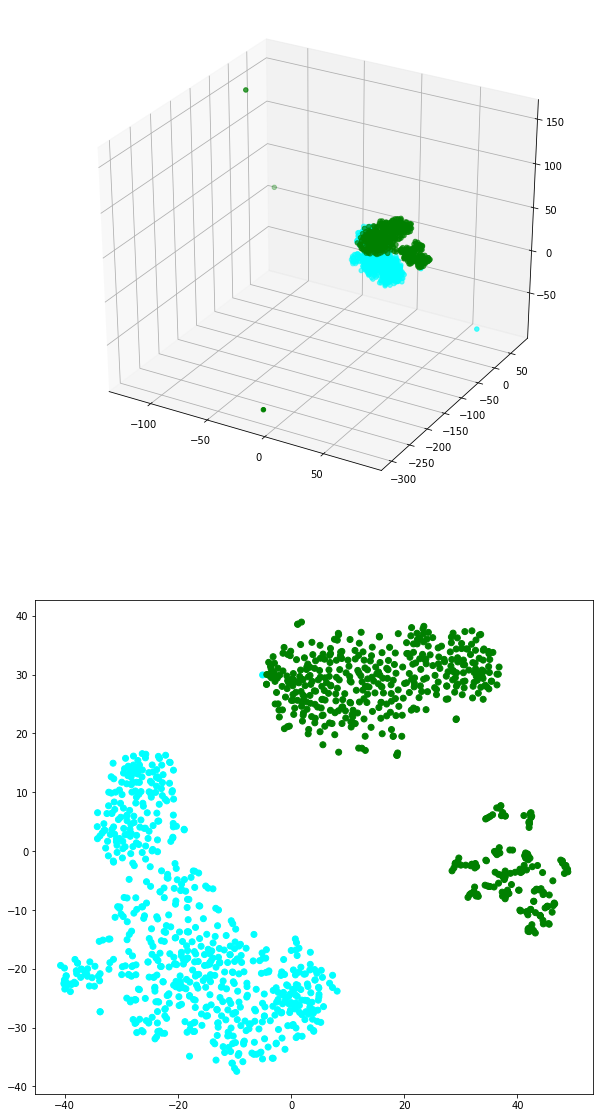

In [63]:
colors = {0: 'aqua', 1: 'green'}
colors_plot = [colors[i] for i in y_use]
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_TSNE_3D[:,0],X_TSNE_3D[:,1],X_TSNE_3D[:,2],c=colors_plot)
ay = fig.add_subplot(212)
ay.scatter(X_TSNE_2D[:,0],X_TSNE_2D[:,1],c=colors_plot)
fig.savefig(str(figure_number)+".png", format = 'png', dpi=250)
figure_number += 1
fig.show()

In [64]:
# Clearly Everything gets predicted correctly

## $Thank\ You$

---